## Introduction to Machine Learning


In [1]:
import numpy as np
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Test data set

We use the Pima indian diabetes data set:

https://github.com/datasets/openml-datasets/tree/master/data/diabetes

Details:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1)

In [4]:
# get test data set
url = "https://raw.githubusercontent.com/datasets/openml-datasets/master/data/diabetes/diabetes.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
# clean data set by dropping zeroes
df = df.replace(0, np.nan).dropna(axis=0, how='any')
print(df.keys())

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')


## Regression
We first consider the problem of regression. We examine least squares fit implemented analytically first and then two times numeric solution.

In [9]:
# get two times data
x = df['plas'].to_numpy()
y = df['insu'].to_numpy()

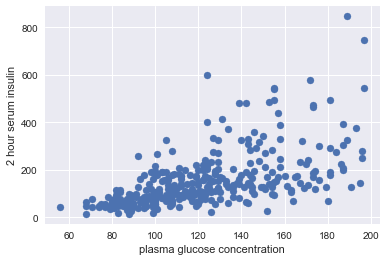

In [10]:
# plot dataset
def plot_dataset(x, y, xlabel='x', ylabel='y'):
    fig, ax = plt.subplots(1)
    ax.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return fig, ax
plot_dataset(x, y, 'plasma glucose concentration', '2 hour serum insulin')
plt.show()

## Linear regression

First we consider univariate linear regression.

A single feature (regressor): plasma glucose concentration
A single dependent variable: serum insulin

Regression model:
$$ y_i = h(x_i;\textbf{w}) + \varepsilon_i$$

Linear model:
$$ y_i = w_1 xi + w_0 + \varepsilon_i$$

Goal: for given $X$, find optimal $\textbf{w} = (w_1, w_0)$.

Method: minimise loss function

Loss function choice:
$$ Q(h, X^l) = \frac{1}{l} \sum_{i=1}^{l} (y_i - h(x_i))^2 $$

For fixed loss function, this is optimisation problem:
$$ \frac{1}{l} \sum_{i=1}^{l} (y_i - w_1 x_i - w_0)^2$$

analytical solution:
$$\hat{w_1} = \frac{\sum_{i=1}^{l} (x_i - \mu_x)(y_i - \mu_y)}{\sum_{i=1}^{l} (x_i - \mu_x)^2} $$

$$\hat{w_0} = \mu_y - \hat{w_1} \mu_x$$

$$\mu_x = \frac{1}{l} \sum_{i=1}^{l} x_i$$
$$\mu_y = \frac{1}{l} \sum_{i=1}^{l} y_i$$

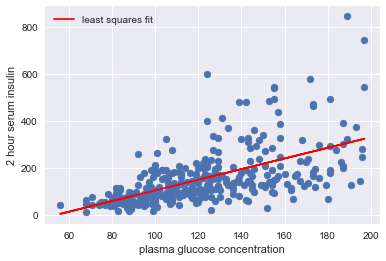

In [11]:
# use linear regression to fit dataset
mu_x = np.mean(x)
mu_y = np.mean(y)
w1 = (np.mean((x - mu_x) * (y - mu_y))) / (np.mean(np.power(x - mu_x, 2)))
w0 = mu_y - w1 * mu_x

# solution
def h(x, w1, w0):
    return w1 * x + w0

# plot solution
fig, ax = plot_dataset(x, y, 'plasma glucose concentration', '2 hour serum insulin')
ax.plot(x, h(x, w1, w0), color='red', label='least squares fit')
plt.legend()
plt.show()

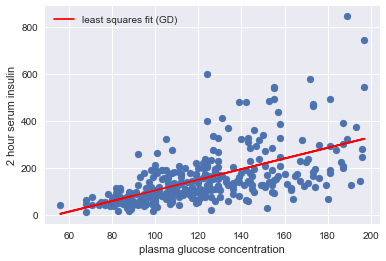

In [12]:
# solve via gradient descent
alpha = 0.1
w_0 = 0
w_1 = 0
for i in range(100):
    # derivative: x * (y - w1 * x - w0)
    w_1 = w1 - alpha * np.mean(x * (y - w1 * x - w0))
    # derivative: (y - w1 * x - w0)
    w_0 = w0 - alpha * np.mean(y - w1 * x - w0)
# plot solution
fig, ax = plot_dataset(x, y, 'plasma glucose concentration', '2 hour serum insulin')
ax.plot(x, h(x, w1, w0), color='red', label='least squares fit (GD)')
plt.legend()
plt.show()

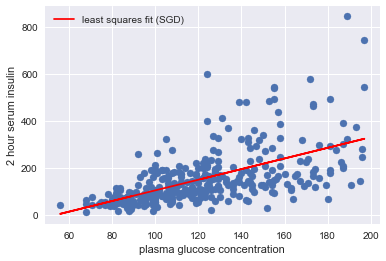

In [13]:
# solve via stochastic gradient descent
alpha = 0.1
w_0 = 0
w_1 = 0
for i in range(100):
    # derivative: x * (y - w1 * x - w0)
    i = np.random.choice(range(len(x)))
    xi = x[i]
    yi = y[i]
    w_1 = w1 - alpha * xi * (yi - w1 * xi - w0)
    w_0 = w0 - alpha * np.mean(yi - w1 * xi - w0)
# plot solution
fig, ax = plot_dataset(x, y, 'plasma glucose concentration', '2 hour serum insulin')
ax.plot(x, h(x, w1, w0), color='red', label='least squares fit (SGD)')
plt.legend()
plt.show()

## Classification
We consider problem of binary classification.
